# 定位到文件的位置 以及所有的头文件

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/LSTM")
!ls

BSrf1000.mat		       IMG		    test2.ipynb
ConvLSTM_little_predict.ipynb  LSTM.h5		    train2.csv
DATA			       test1-analyse.ipynb  train.csv
DataProcess		       test1.ipynb	    Untitled0.ipynb
Different_Models_Score_Pic     test2_all.ipynb


In [0]:
import os
import csv
import numpy
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pandas import read_csv
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# 想直接使用flatten函数进行去掉嵌套的括号，查资料发现这条语句在python3之后被废除了，因此改用其它的方法
# from compiler.ast import flatten

# 装载mat文件进行运算

## 注意！此代码行只能运行一次即可

In [0]:
m = loadmat("BSrf1000.mat")

In [0]:
df = pd.DataFrame(m["BaseStationnum0"])
df.to_csv("train.csv")

## 如果有CSV文件了那么直接拿来运行即可，无需在来跑一遍loadmat，那么程序的内存占用的很大

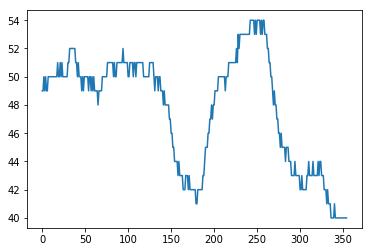

In [0]:
dataframe = read_csv('train.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values

# 去掉将数据转为整型
# dataset = dataset.astype("float32")

plt.plot(dataset)
plt.show()


## 显示一下dataset

In [0]:
print(dataset)

[[49]
 [49]
 [50]
 [49]
 [50]
 [49]
 [49]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [51]
 [50]
 [50]
 [51]
 [50]
 [51]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [51]
 [51]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [51]
 [51]
 [50]
 [51]
 [50]
 [50]
 [50]
 [49]
 [50]
 [49]
 [50]
 [50]
 [50]
 [50]
 [50]
 [49]
 [50]
 [50]
 [49]
 [50]
 [49]
 [50]
 [49]
 [49]
 [49]
 [49]
 [48]
 [49]
 [49]
 [49]
 [49]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [50]
 [51]
 [50]
 [50]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [52]
 [51]
 [51]
 [51]
 [51]
 [51]
 [50]
 [50]
 [51]
 [51]
 [51]
 [51]
 [50]
 [51]
 [51]
 [50]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [51]
 [51]
 [51]
 [51]
 [51]
 [50]
 [49]
 [50]
 [50]
 [50]
 [49]
 [50]
 [50]
 [49]
 [49]
 [49]
 [48]
 [49]
 [48]
 [48]
 [48]
 [48]
 [48]
 [47]
 [47]
 [46]
 [46]
 [45]
 [45]
 [44]
 [44]
 [44]
 [44]
 [43]
 [44]
 [43]
 [43]
 [43]
 [43]
 [42]
 [42]
 [42

## dataFrame的这一列转变为list来进行运算

In [0]:
new_df = dataset.tolist()
print(new_df)

[[49], [49], [50], [49], [50], [49], [49], [50], [50], [50], [50], [50], [50], [50], [50], [50], [50], [50], [51], [50], [50], [51], [50], [51], [50], [50], [50], [50], [50], [50], [51], [51], [52], [52], [52], [52], [52], [52], [52], [51], [51], [50], [51], [50], [50], [50], [49], [50], [49], [50], [50], [50], [50], [50], [49], [50], [50], [49], [50], [49], [50], [49], [49], [49], [49], [48], [49], [49], [49], [49], [50], [50], [50], [50], [50], [50], [51], [51], [51], [51], [51], [51], [51], [50], [51], [50], [50], [51], [51], [51], [51], [51], [51], [51], [52], [51], [51], [51], [51], [51], [50], [50], [51], [51], [51], [51], [50], [51], [51], [50], [51], [51], [51], [51], [51], [51], [51], [51], [50], [50], [50], [50], [50], [50], [50], [51], [51], [51], [51], [51], [50], [49], [50], [50], [50], [49], [50], [50], [49], [49], [49], [48], [49], [48], [48], [48], [48], [48], [47], [47], [46], [46], [45], [45], [44], [44], [44], [44], [43], [44], [43], [43], [43], [43], [42], [42], [42

## 本来想用flatten函数进行转化，发现这条语句在python3之后就被废除了，因此采用新的方法来实现处理此函数

In [0]:
# new_df2 = flatten(new_df)
# print(new_df2)

## 方案1：自建一个函数来写

In [0]:

# import collections
# def flatten(x):
#     result = []
#     for el in x:
#         if isinstance(x, collections.Iterable) and not isinstance(el, str):
#             result.extend(flatten(el))
#         else:
#             result.append(el)
#     return result
 
# print(flatten(["junk",["nested stuff"],[],[[]]]))


In [0]:
new_df2 = eval('[%s]'%repr(new_df).replace('[', '').replace(']', ''))
print(new_df2)

[49, 49, 50, 49, 50, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 50, 50, 51, 50, 51, 50, 50, 50, 50, 50, 50, 51, 51, 52, 52, 52, 52, 52, 52, 52, 51, 51, 50, 51, 50, 50, 50, 49, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 49, 50, 49, 50, 49, 49, 49, 49, 48, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 50, 51, 50, 50, 51, 51, 51, 51, 51, 51, 51, 52, 51, 51, 51, 51, 51, 50, 50, 51, 51, 51, 51, 50, 51, 51, 50, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 50, 49, 50, 50, 50, 49, 50, 50, 49, 49, 49, 48, 49, 48, 48, 48, 48, 48, 47, 47, 46, 46, 45, 45, 44, 44, 44, 44, 43, 44, 43, 43, 43, 43, 42, 42, 42, 43, 43, 43, 42, 43, 42, 42, 42, 42, 42, 42, 42, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 44, 45, 45, 45, 46, 46, 47, 47, 48, 47, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 51, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 53, 54, 53,

In [0]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = new_df2
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction


## 预测接下来的一个数据

In [0]:
# # demonstrate prediction
# x_input = array(new_df2[300:304])
# x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

[[42.70913]]


## 预测出所有的数据存到array中   
提取出后10%作为预测的数据来进行预测

In [0]:
import datetime
print(len(new_df2))
now = int(len(new_df2) * 0.67)
print(now)
# list_test为预测的数组数据
list_test = []
start = datetime.datetime.now()

while(now != len(new_df2)-1):
  x_input = array(new_df2[now-4:now])
  x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  predict_num = float(yhat)
  list_test.append(predict_num)
  print(predict_num)
  now = now + 1

end = datetime.datetime.now()
print(end - start)
print(list_test)

355
237
53.68675994873047
53.68675994873047
53.68675994873047
53.68675994873047
53.68675994873047
53.68675994873047
54.27399826049805
54.4967041015625
54.67665100097656
54.70936584472656
54.70936584472656
54.11737823486328
54.48627471923828
53.94549560546875
54.45375061035156
54.535247802734375
54.67665100097656
54.70936584472656
54.11737823486328
54.48627471923828
53.94549560546875
54.45375061035156
54.535247802734375
54.08735656738281
53.894100189208984
53.722408294677734
53.10169982910156
52.87860107421875
52.1214485168457
51.861854553222656
51.10875701904297
50.84397888183594
50.094966888427734
49.26274871826172
49.41792678833008
48.839969635009766
48.74877166748047
48.06455993652344
47.78456497192383
47.04814910888672
46.76319885253906
46.03108215332031
46.282169342041016
45.76775360107422
45.69658279418945
45.54608154296875
45.4845085144043
44.95450973510742
45.26301574707031
45.27202224731445
45.447052001953125
44.95450973510742
44.73283004760742
44.522735595703125
43.9528274536

# 画出图像

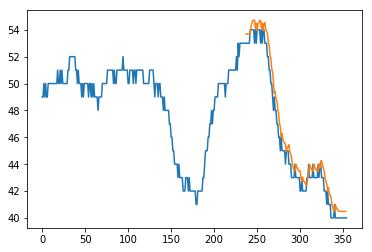

In [0]:
plt.plot(new_df2)
x = range(int(len(new_df2) * 0.67), len(new_df2) - 1)
plt.plot(x, list_test)
os.chdir("/content/drive/My Drive/LSTM/IMG_ConvLSTM")
plt.savefig("BaseStationnum0-0-0.67.jpg")
os.chdir("/content/drive/My Drive/LSTM")